In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
%matplotlib inline

In [19]:
df = pd.read_csv(r'population_data/japan_population.csv')
print(df.head())
print(df.shape)

    集計年  都道府県コード 都道府県名        総人口
0  1960        1   北海道  5039206.0
1  1960        2   青森県  1426606.0
2  1960        3   岩手県  1448517.0
3  1960        4   宮城県  1743195.0
4  1960        5   秋田県  1335580.0
(3055, 4)


In [20]:
tokyo = df[df[r'都道府県名'] == r'東京都']
print(tokyo.head(10))

      集計年  都道府県コード 都道府県名         総人口
12   1960       13   東京都   9683802.0
59   1961       13   東京都   9967000.0
106  1962       13   東京都  10224000.0
153  1963       13   東京都  10470000.0
200  1964       13   東京都  10668000.0
247  1965       13   東京都  10869244.0
294  1966       13   東京都  11018000.0
341  1967       13   東京都  11162000.0
388  1968       13   東京都  11286000.0
435  1969       13   東京都  11367000.0


In [21]:
# 1960年から2015年までの東京都の総人口数データを機械学習にかける。
# ある年の総人口数を説明変数X、その翌年の総人口数を目的変数yに設定する
# （Xとyの両方とも、縦56行×横1列のndarrayで作成する）
data_num = 56
X = np.empty(shape=(data_num,1), dtype=np.uint32)
y = np.empty(shape=(data_num,1), dtype=np.uint32)

for i in range(data_num):
    X[i][0] = tokyo.iloc[i, 3]
    y[i][0] = tokyo.iloc[i+1, 3]

print(r'X=', X[:10])
print(r'y=', y[:10])

X= [[ 9683802]
 [ 9967000]
 [10224000]
 [10470000]
 [10668000]
 [10869244]
 [11018000]
 [11162000]
 [11286000]
 [11367000]]
y= [[ 9967000]
 [10224000]
 [10470000]
 [10668000]
 [10869244]
 [11018000]
 [11162000]
 [11286000]
 [11367000]
 [11408071]]


In [22]:
# 1960年から2009年までを訓練データ、
# 2010年以降をテストデータとして分割する
X_train = X[:50]
X_test = X[50:]
y_train = y[:50]
y_test = y[50:]

In [23]:
# 線形回帰モデルの作成と学習の実行
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# テストデータで「翌年の総人口」予測の実施
y_pred = model.predict(X_test)
# 予測結果は実数値のため、整数値に変換
y_pred = y_pred.astype(np.uint32)
print(y_pred)
print(y_test)

[[13149404]
 [13185920]
 [13219966]
 [13289004]
 [13376011]
 [13485972]]
[[13198000]
 [13234000]
 [13307000]
 [13399000]
 [13515271]
 [13624000]]


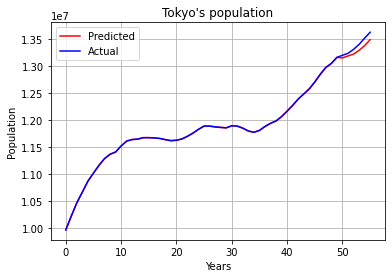

In [25]:
# 正解値とグラフで比較するため
# 実測値と予測値とを連結させた配列y_pred_grを作成
y_pred_gr = np.concatenate([y_train, y_pred])
# 正解値と予測値のグラフ表示
plt.plot(range(56), y_pred_gr, label='Predicted', color='red')
plt.plot(range(56), y, label='Actual', color='blue')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title("Tokyo's population")
plt.grid(True)
plt.legend(loc = "upper left")